# Desafío evaluado S1: 

## Expansiones basales

* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigasdeconcreto,aestacapacidaddesoportarfuerzasque buscan reducir la superficie o volumen de un cuerpo se le conoce como **fuerza compresiva**

### Ejercicio 1: Preparar el ambiente de trabajo

In [2]:
## Basicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")


# Regularizacion
from sklearn.preprocessing import StandardScaler # normalizar muestra
from sklearn.model_selection import train_test_split # separar muestras train test

# indicadores
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

# funciones propias
from a_exploratorio import graficar_cont

In [3]:
df = pd.read_csv('compresive_strength_concrete.csv') # Obtener Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

* No hay presencia de datos perdidos

In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


* Blast furnance, fly ash: muestran una gran diferencia de la media con la concentracion de datos, se analizaran mas adelante.
* en ambas columnas se aprecian valores igual a cero, igual que en superplasticizer, sin embargo en esta columna no difiere tanto la media de la concentracion de datos.

### Ejercicio 2: Descripccion

#### Notamos que el nombre del as columnas son demasiado largos, por lo que por tema practico, se renombraran.

In [7]:
df.shape

(1030, 9)

In [8]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
nuevas_columnas = {
       'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnace_Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash' ,
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine_Aggregate',
       'Age (day)':'Age_days',
       'Concrete compressive strength(MPa, megapascals) ':'Concrete_compressive_strength'}

In [10]:
df = df.rename(columns=nuevas_columnas)


In [11]:
parametros = df.columns.tolist()
parametros.remove('Concrete_compressive_strength')
parametros

['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age_days']

In [12]:
vec_obj = ['Concrete_compressive_strength']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age_days                       1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Analisis del vector obj

In [14]:
df[vec_obj].describe()

,Concrete_compressive_strength
count,1030.000000
mean,35.817961
std,16.705742
min,2.330000
25%,23.710000
50%,34.445000
75%,46.135000
max,82.600000


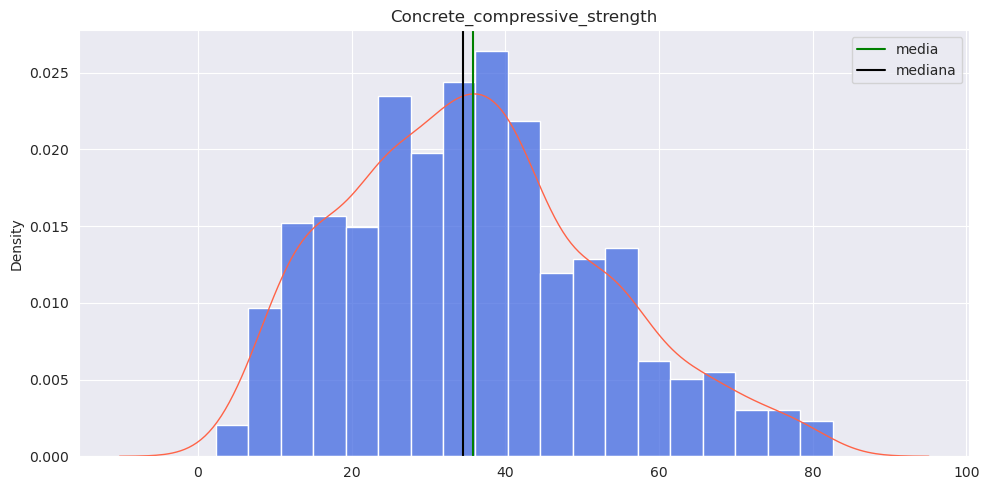

In [15]:
graficar_cont(df, vec_obj, figura=(10,5))

* Muestra un comportamiento bueno en cuanto a dispersion, levemente cargada a los valores mas bajos, con una media y mediana bastante similar

#### Analisis de parametros

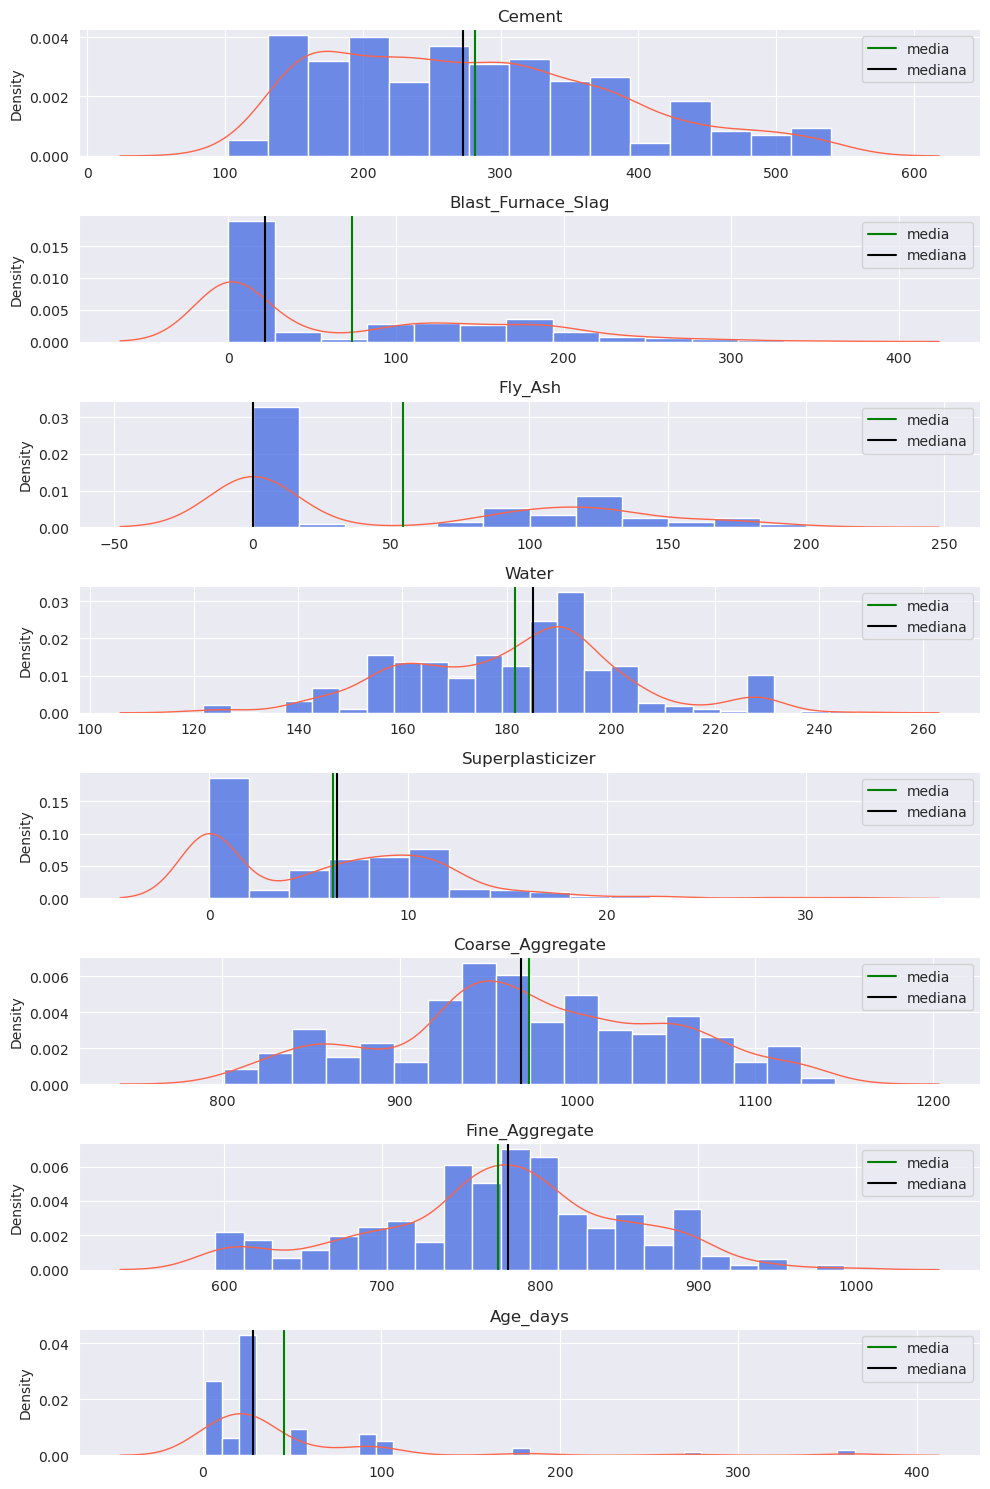

In [16]:
graficar_cont(df, parametros, figura=(10,15))

* Blast furnance, fly ash y age tienen las mayores dispersiones de datos, analicemos sus boxplots

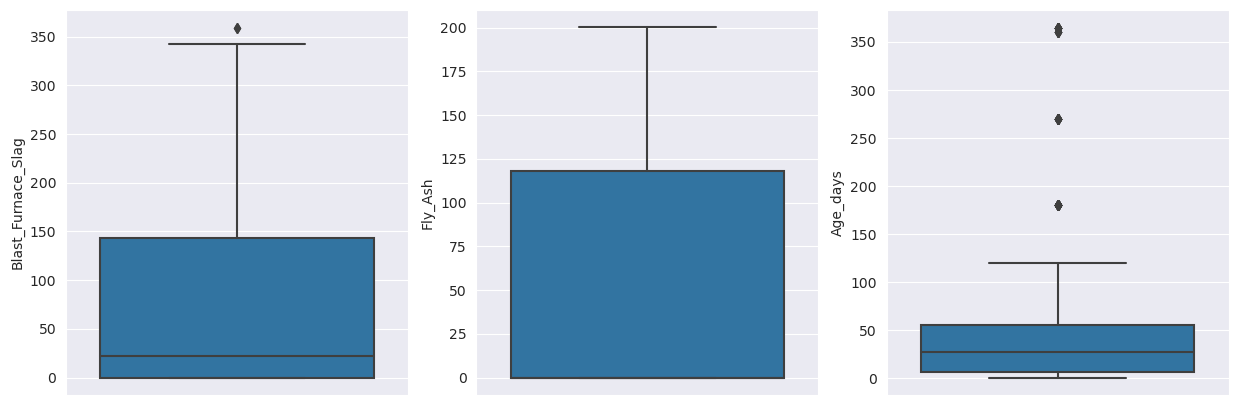

In [17]:
dispersiones = ['Blast_Furnace_Slag',
 'Fly_Ash', 'Age_days']
plt.figure(figsize=(15,5))
for n, col in enumerate(dispersiones):
    plt.subplot(1,3,n+1)
    sns.boxplot(data=df, y=df[col])

* En los boxplot queda claro el comportamiento de las variables, donde marcan un gran sesgo en sus datos.

#### Multi variado

In [18]:
len(parametros)

8

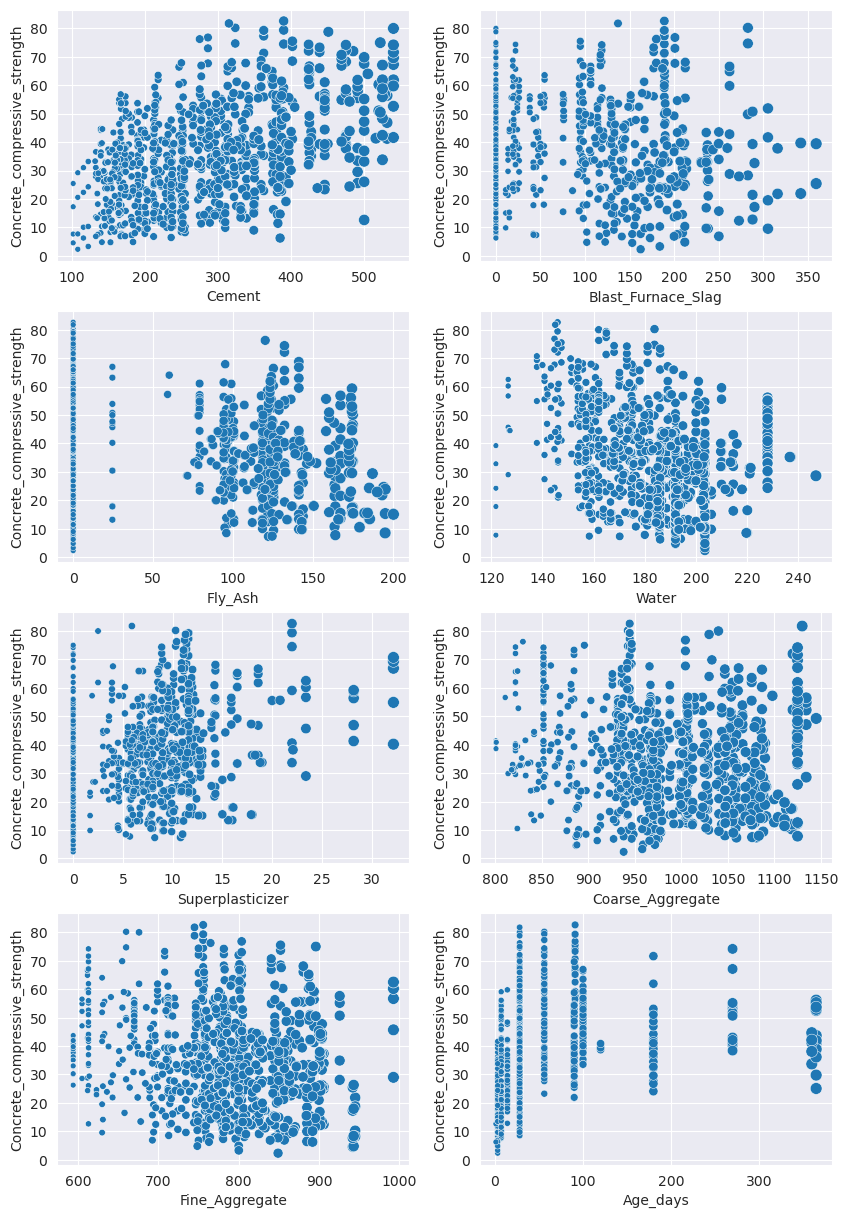

In [19]:
fig = plt.figure(figsize=(10,15))

for n, col in enumerate(parametros):
    plt.subplot(4,2,n+1)
    sns.scatterplot(data=df, x=col, y=vec_obj[0], size=col, legend=False)
    

* Se observan tendecias bastante marcadas, veamos las correlaciones.

In [20]:
df_corr = df.corr().copy()

<AxesSubplot:>

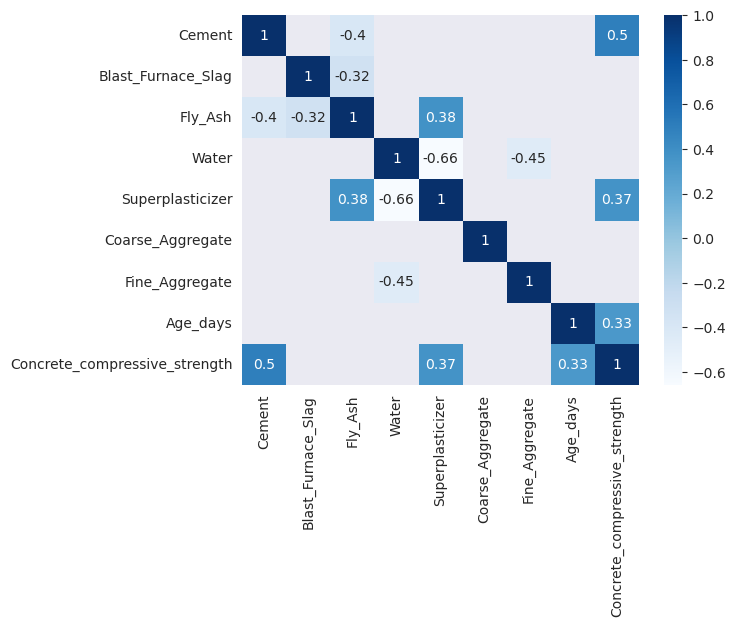

In [21]:
sns.heatmap(data=df_corr[np.absolute(df_corr)>=.3], cmap='Blues',annot=True)

* La mayor correlacion se encuentra entre las variables cemento de forma positiva y agua de manera negativa.
* se incluiran las mejores correlaciones al modelo

In [22]:
best_corr = ['Cement',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Fine_Aggregate',
 'Age_days']

#### Optaremos por escalar los datos

In [23]:
columnas = df.columns.tolist()
columnas

['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age_days',
 'Concrete_compressive_strength']

### Ejercicio 3: Modelo

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pygam import LinearGAM, s

#### Dividir la muestra y escalar

In [25]:
X_train_pre, X_test_pre, y_train, y_test = train_test_split(df.loc[:,best_corr], df[vec_obj[0]],
                                                             test_size =.3, random_state = 1991)
scaler = StandardScaler().fit(X_train_pre)
# Con el estandarizador ajustado sobre entrenamiento, transformamos el conjunto de entrenamiento con esta estandarizacion
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns=X_train_pre.columns)
# Transformamos el conjunto de pruebas con el estandarizador ajustado sobre entrenamiento
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns=X_test_pre.columns)

In [26]:
gam0 = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5), fit_intercept=True)

In [27]:
model_gam0 = gam0.fit(X_train, y_train)

In [28]:
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test Median Absolute Error:{0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))
report_gam_metrics(gam0, X_test, y_test)

Test R^2: 0.821
Test RMSE: 7.147
Test Median Absolute Error:4.706


#### Gridsearch

In [29]:
lams = np.logspace(-3, 3, 3)
lams = [lams]* len(X_train.columns)
lams

[array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03])]

In [30]:
gam1 = LinearGAM(s(0)+s(1)+s(2)+s(3)+s(4)+s(5), fit_intercept=True)

In [31]:
gam1.gridsearch(X_train.values, y_train.values, lam = lams)

100% (729 of 729) |######################| Elapsed Time: 0:00:28 Time:  0:00:28


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [32]:
y_hat1= model_gam0.predict(X_test)

In [33]:
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test Median Absolute Error:{0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))

In [34]:
report_gam_metrics(gam0, X_test, y_test)
print('--------------------------------')
report_gam_metrics(gam1, X_test, y_test)

Test R^2: 0.821
Test RMSE: 7.147
Test Median Absolute Error:4.706
--------------------------------
Test R^2: 0.829
Test RMSE: 6.978
Test Median Absolute Error:4.343


* Como resultado podemos ver que el modelo generado con gridsearch tiene mejor r2 y menores errores RMSE MAE, por ende es mejor.

### Ejercicio 4: Dependencia parcial

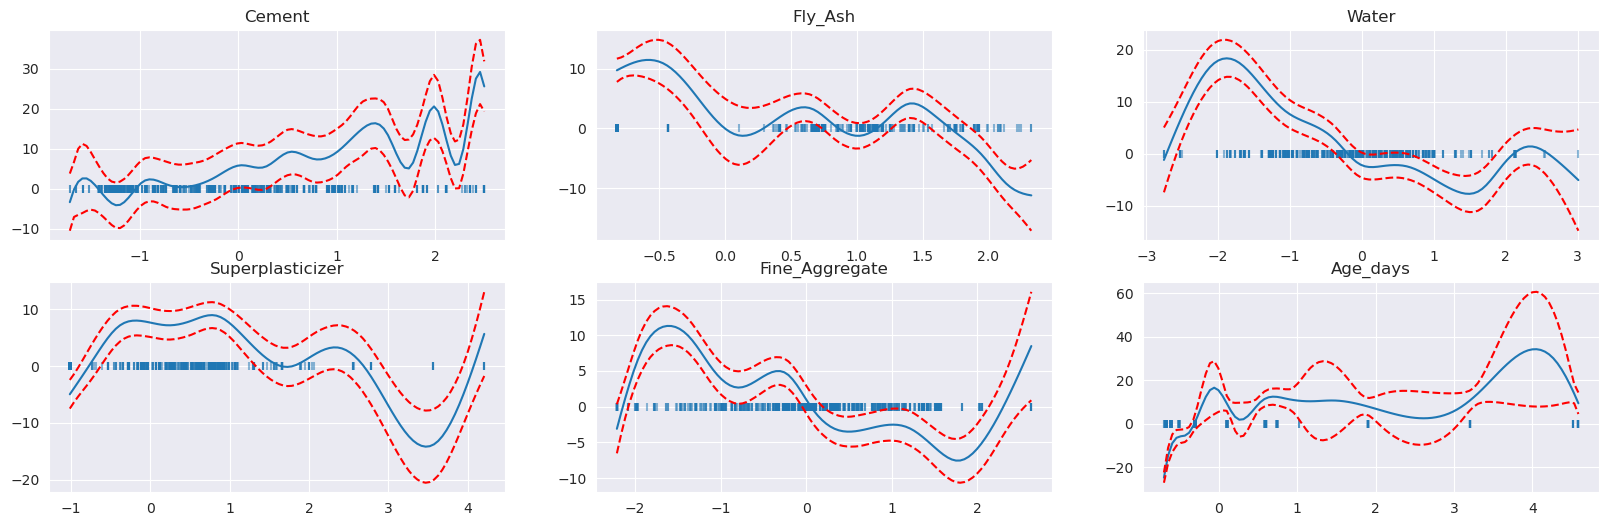

In [35]:
fig, axs = plt.subplots(2,3, figsize = (20,6));
titles = X_train.columns
for i, ax in enumerate(axs.flatten()):
    XX = gam1.generate_X_grid(term=i) # Muestreo de puntos
    ax.plot(XX[:, i], gam1.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam1.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
    ax.set_title(titles[i]);

* Las variables mas importantes parecen ser:
    - Cement con relacion positiva y buena distribucion de los datos
    - Wather con relacio negativa y buena distribucion de los datos
    - Fine_aggregate con una gran concentracion de datos en su parte en que es decreciente.
* Luego las demas variables, no marcan una tendencia clara y/o tienen un sesgo en sus datos. 